In [ ]:
pip install pykan

In [ ]:
from kan import KAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('customer_purchase_data.csv')
data

Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5               1  
1              38.240097               0                 5               0  
2              31.633212               1                 0               1  
3              46.167059               0                 4               1  
4              19.823592               0                 0               1  
...                  ...             ...               ...             ...  
1495           34.590743               0                 5               1  
1496           17.625707               0                 1               1  
1497           12.206033               0                 0               0  
1498           37.311634               1                 0               1  
1499           25.348017               1                 4               1  

[1500 rows x 9 columns]

In [ ]:
X = data.drop('PurchaseStatus', axis=1)
y = data['PurchaseStatus']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dataset = {}
dataset['train_input'] = torch.tensor(X_train)
dataset['test_input'] = torch.tensor(X_test)
dataset['train_label'] = torch.tensor(y_train.values)
dataset['test_label'] = torch.tensor(y_test.values)

In [ ]:
model = KAN(width=[8, 17, 2], k=5, grid=10)

In [ ]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=30, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss());
results['train_acc'][-1], results['test_acc'][-1]

train loss: 8.42e-04 | test loss: 1.97e+01 | reg: 6.70e+01 : 100%|██| 30/30 [07:11<00:00, 14.39s/it]


(1.0, 0.8566666841506958)

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8766666666666667

In [ ]:
clf.n_layers_

3

In [ ]:
X_tens = torch.tensor(X)
X_tens

tensor([[-0.2768,  0.9907, -0.4819,  ...,  0.0059, -0.6965,  1.4342],
        [-1.5644,  0.9907, -1.6128,  ...,  0.4577, -0.6965,  1.4342],
        [-1.1137,  0.9907,  1.1583,  ...,  0.0686,  1.4357, -1.4991],
        ...,
        [-0.2768,  0.9907, -0.7147,  ..., -1.0756, -0.6965, -1.4991],
        [ 1.2040, -1.0094,  1.3231,  ...,  0.4030,  1.4357, -1.4991],
        [ 0.3671, -1.0094, -0.8407,  ..., -0.3016,  1.4357,  0.8475]],
       dtype=torch.float64)

In [ ]:
y_tens = torch.tensor(y.values)
y_tens

tensor([1, 0, 1,  ..., 0, 1, 1])

In [ ]:
res = model(X_tens)
res_lst = res.tolist()
res_lst = [x.index(max(x)) for x in res_lst]
res = torch.tensor(res_lst)
res

tensor([1, 0, 1,  ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_tens, res)

0.9713333333333334

In [ ]:
pred = clf.predict(X)
accuracy_score(y_tens, pred)

0.8966666666666666

In [ ]:
res1 = model(torch.tensor(X_test))
res_lst1 = res1.tolist()
res_lst1 = [x.index(max(x)) for x in res_lst1]
res1 = torch.tensor(res_lst1)
res1

tensor([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
accuracy_score(y_test, res1)

0.8566666666666667

In [ ]:
pred1 = clf.predict(X_test)
accuracy_score(y_test, pred1)

0.8766666666666667

KAN обработал исходную выборку лучше, чем MLPClassifier (97% против 89%)

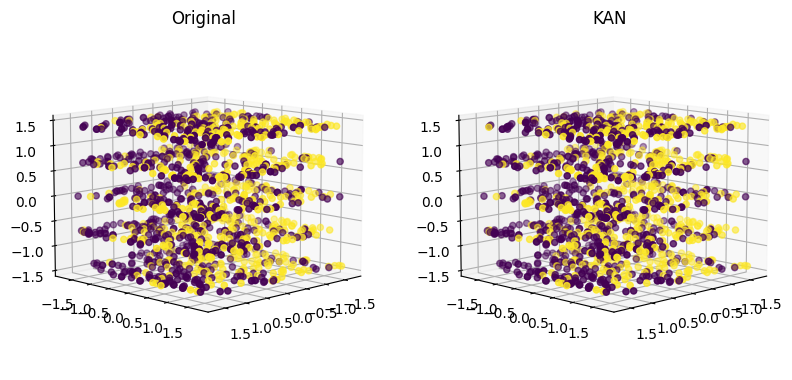

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection="3d", elev=10, azim=45)
ax1.set_title("Original")
scatter1 = ax1.scatter(xs=X_tens[:, 0], ys=X_tens[:, 2], zs=X_tens[:, 4], c=torch.tensor(y.values))

ax2 = fig.add_subplot(1, 2, 2, projection="3d", elev=10, azim=45)
ax2.set_title("KAN")
scatter2 = ax2.scatter(xs=X_tens[:, 0], ys=X_tens[:, 2], zs=X_tens[:, 4], c=res)

In [ ]:
def update(frame):
    ax1.view_init(frame/8, frame)
    ax2.view_init(frame/8, frame)
    return scatter1, scatter2

ani = FuncAnimation(fig, update, frames=np.linspace(0, 360, 360), blit=True, interval=33)

HTML(ani.to_html5_video())

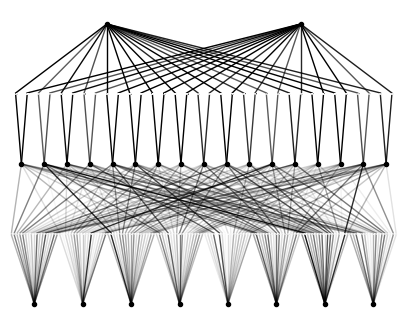

In [ ]:
model.plot()